In [0]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [0]:
import numpy as np
def vertorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequences in enumerate(sequences):
    results[i,sequences]=1.
  return results

In [0]:
x_train=vertorize_sequences(train_data)
x_test=vertorize_sequences(test_data)


In [0]:
def to_one_hot(labels,dimension=46):
  results=np.zeros((len(labels),dimension))
  for i, label in enumerate(labels):
    results[i,label]=1.
  return results

In [0]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [0]:
from keras import models
from keras import layers

In [0]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [43]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 225us/step - loss: 2.5932 - acc: 0.5479 - val_loss: 1.7240 - val_acc: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 128us/step - loss: 1.3948 - acc: 0.7164 - val_loss: 1.2737 - val_acc: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0209 - acc: 0.7924 - val_loss: 1.1080 - val_acc: 0.7720
Epoch 4/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.7961 - acc: 0.8339 - val_loss: 0.9967 - val_acc: 0.7960
Epoch 5/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.6298 - acc: 0.8687 - val_loss: 0.9422 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.4990 - acc: 0.8943 - val_loss: 0.8915 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 126us/step - loss: 0.3973 - acc: 0.9166 - val_loss: 0.8660 - val_acc: 0.

In [0]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss)+1)

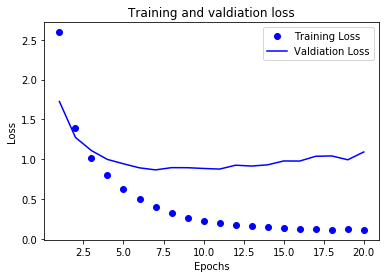

In [47]:
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Valdiation Loss')
plt.title('Training and valdiation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

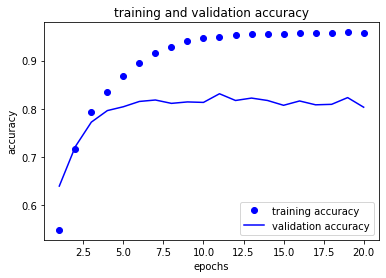

In [48]:
plt.clf()
acc=history.history['acc']
val_acc=history.history['val_acc']

plt.plot(epochs,acc,'bo',label='training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [49]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=512,validation_data=(x_val,y_val))
results=model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 162us/step - loss: 2.5975 - acc: 0.5337 - val_loss: 1.7663 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.4197 - acc: 0.7092 - val_loss: 1.2909 - val_acc: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 127us/step - loss: 1.0416 - acc: 0.7759 - val_loss: 1.1151 - val_acc: 0.7590
Epoch 4/9
7982/7982 [==============================] - 1s 130us/step - loss: 0.8222 - acc: 0.8264 - val_loss: 1.0457 - val_acc: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.6579 - acc: 0.8659 - val_loss: 0.9500 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.5266 - acc: 0.8914 - val_loss: 0.9253 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.4247 - acc: 0.9122 - val_loss: 0.9014 - val_acc: 0.8130
Epoch 8

In [50]:
results

[1.0054552196288682, 0.7800534283435462]

In [0]:
predictions=model.predict(x_test)

In [53]:
np.argmax(predictions[3])

4